In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Load pre-processed data
CL_CRC_BA = pd.read_csv("SingaporeCRC_data/CL_BA.csv", index_col=0, delimiter=",")
CL_CRC_BA = CL_CRC_BA.T
CL_CRC_BA.index.name = 'patient_id'
CL_CRC_BA

,g__Roseburia,g__Enterocloster,g__Blautia,g__Agathobacter,g__Lachnoclostridium,g__Coprococcus,g__Butyrivibrio,g__Lachnospira,g__Anaerostipes,g__Lacrimispora,...,g__Pseudoprevotella,g__Hoylesella,g__Aeromonas,g__Haemophilus,g__Leptotrichia,g__Treponema,g__Megamonas,g__Nocardioides,g__Petrimonas,g__Hymenobacter
patient_id,,,,,,,,,,,,,,,,,,,,,
X47,1.630613,0.183694,1.048691,-0.103988,-0.286310,0.743310,-0.509453,-1.202600,-1.202600,-1.895748,...,1.048691,-0.797135,0.301477,-1.202600,4.982579,0.050162,-1.202600,0.502148,-1.895748,-0.509453
X95,3.889290,3.756106,3.392034,2.982850,0.467386,0.082975,-1.031386,2.413297,1.457481,0.143599,...,1.957178,-4.075908,-4.075908,-4.075908,-4.075908,-3.382761,2.993115,-2.977296,0.488440,0.568483
X106,0.278136,2.215077,0.550070,-1.801306,0.395919,0.550070,-1.801306,-1.395841,-1.108158,-1.801306,...,2.100667,1.289737,-1.801306,-2.494453,-1.801306,-1.801306,-2.494453,-2.494453,-0.191868,-1.801306
X153,0.969917,2.822977,2.356212,1.627973,-2.397378,1.851117,-2.397378,0.000517,0.821497,-1.704231,...,3.136011,3.107953,-1.011084,-2.397378,2.593054,-2.397378,-1.298766,-2.397378,0.860718,-1.704231
X326,0.568649,5.213040,4.422658,-1.829246,0.310820,2.131567,0.310820,-0.730634,1.466591,-2.522393,...,-1.136099,-0.325168,-0.730634,4.895788,0.185657,-2.522393,6.470537,-2.522393,-2.522393,-0.124498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1662,5.667685,1.754647,3.414031,4.914790,0.045475,2.763234,-0.410001,-0.490044,0.797811,-2.751807,...,1.980877,0.045475,-1.029040,-2.058660,1.094076,-3.668097,4.726589,-4.361245,-3.668097,-3.262632
X1664,1.979841,1.979841,0.986589,0.629915,0.293442,1.775047,-1.315996,-1.315996,-0.217383,0.070299,...,-1.315996,-1.315996,-1.315996,0.986589,-1.315996,-1.315996,0.293442,-0.622848,-1.315996,-0.622848
X1665,2.264600,1.971931,4.036258,4.899384,0.893121,1.971931,0.257132,0.257132,1.525643,-1.246945,...,-0.841480,-1.940092,-1.940092,5.129782,-1.246945,-1.246945,-1.246945,-1.940092,-1.940092,-1.940092


In [42]:
metadata = pd.read_csv("SingaporeCRC_data/filtered_metadata.csv", index_col=0,delimiter=",")
metadata = metadata.dropna()
metadata

,patient_id,TMB,KRAS,BRAF,NRAS,TP53,APC,PIK3CA,PIK3R1,SMAD4,...,Age.at.Diagnosis,Site.of.Primary.Colorectal.tumour,Side,Grade,TNM,Stage,iCMS,CMS,group3,group5
3,X106,1028,wt,wt,wt,wt,wt,wt,wt,wt,...,72.0,Transverse colon,Right,3,T4aN2(4/29)M0,IIIC,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
4,X153,80,mut,wt,wt,mut,mut,mut,wt,wt,...,66.0,Sigmoid colon,Left,2,T3N1(1/18)M0,IIIB,iCMS2,CMS4,iCMS2_MSS,iCMS2_fibrotic
5,X326,1512,mut,wt,wt,wt,wt,wt,wt,wt,...,55.0,Rectosigmoid junction,Left,2,Unknown,II,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
7,X420,1976,mut,wt,wt,mut,mut,wt,wt,wt,...,58.0,Sigmoid colon,Left,2,T3N1(1/23)M0,IIIB,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
8,X470,739,wt,wt,wt,wt,wt,wt,mut,mut,...,53.0,Ascending colon,Right,2,T3N1(1/11)M0,IIIB,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,X1658,82,mut,wt,wt,mut,mut,wt,wt,wt,...,59.0,Rectum,Left,2,T3N2b(8/22)M1,IV,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
143,X1662,74,mut,wt,wt,mut,wt,wt,wt,wt,...,67.0,Rectum,Left,2,T3N1a(1/36)M0,IIIB,iCMS3,CMS3,iCMS3_MSS,iCMS3_MSS
144,X1664,46,mut,wt,wt,mut,wt,wt,wt,wt,...,62.0,Sigmoid colon,Left,2,T3N2a(6/29)M0,IIIC,iCMS2,CMS4,iCMS2_MSS,iCMS2_fibrotic
145,X1665,93,mut,wt,wt,mut,mut,wt,wt,wt,...,78.0,Sigmoid colon,Left,2,T3N1c(0/15)M0,IIIB,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS


In [43]:
SG_CL_CRC_BA = pd.merge(CL_CRC_BA, metadata, on='patient_id', how='inner')
SG_CL_CRC_BA

,patient_id,g__Roseburia,g__Enterocloster,g__Blautia,g__Agathobacter,g__Lachnoclostridium,g__Coprococcus,g__Butyrivibrio,g__Lachnospira,g__Anaerostipes,...,Age.at.Diagnosis,Site.of.Primary.Colorectal.tumour,Side,Grade,TNM,Stage,iCMS,CMS,group3,group5
0,X106,0.278136,2.215077,0.550070,-1.801306,0.395919,0.550070,-1.801306,-1.395841,-1.108158,...,72.0,Transverse colon,Right,3,T4aN2(4/29)M0,IIIC,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
1,X153,0.969917,2.822977,2.356212,1.627973,-2.397378,1.851117,-2.397378,0.000517,0.821497,...,66.0,Sigmoid colon,Left,2,T3N1(1/18)M0,IIIB,iCMS2,CMS4,iCMS2_MSS,iCMS2_fibrotic
2,X326,0.568649,5.213040,4.422658,-1.829246,0.310820,2.131567,0.310820,-0.730634,1.466591,...,55.0,Rectosigmoid junction,Left,2,Unknown,II,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
3,X420,2.876205,0.909352,3.305562,3.162591,-0.135193,1.917580,-1.981020,-0.681737,1.154474,...,58.0,Sigmoid colon,Left,2,T3N1(1/23)M0,IIIB,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
4,X470,2.681349,4.150283,4.035412,-0.221847,0.893461,2.954944,-0.063376,2.027849,2.042648,...,53.0,Ascending colon,Right,2,T3N1(1/11)M0,IIIB,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,X1658,3.007520,1.706383,3.311731,1.503442,-0.393678,1.746388,-0.393678,-0.105996,0.859085,...,59.0,Rectum,Left,2,T3N2b(8/22)M1,IV,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
107,X1662,5.667685,1.754647,3.414031,4.914790,0.045475,2.763234,-0.410001,-0.490044,0.797811,...,67.0,Rectum,Left,2,T3N1a(1/36)M0,IIIB,iCMS3,CMS3,iCMS3_MSS,iCMS3_MSS
108,X1664,1.979841,1.979841,0.986589,0.629915,0.293442,1.775047,-1.315996,-1.315996,-0.217383,...,62.0,Sigmoid colon,Left,2,T3N2a(6/29)M0,IIIC,iCMS2,CMS4,iCMS2_MSS,iCMS2_fibrotic
109,X1665,2.264600,1.971931,4.036258,4.899384,0.893121,1.971931,0.257132,0.257132,1.525643,...,78.0,Sigmoid colon,Left,2,T3N1c(0/15)M0,IIIB,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS


In [44]:
class_counts = SG_CL_CRC_BA['Site.of.Primary.Colorectal.tumour'].value_counts()
print(class_counts)

Site.of.Primary.Colorectal.tumour
Sigmoid colon            33
Rectum                   21
Ascending colon          12
Cecum                    12
Rectosigmoid junction     9
Transverse colon          8
Descending colon          8
Splenic flexure           7
Hepatic flexure           1
Name: count, dtype: int64


In [45]:
SG_CL_CRC_BA = SG_CL_CRC_BA[SG_CL_CRC_BA['Site.of.Primary.Colorectal.tumour'] != 'Hepatic flexure']
class_counts = SG_CL_CRC_BA['Site.of.Primary.Colorectal.tumour'].value_counts()
print(class_counts)

Site.of.Primary.Colorectal.tumour
Sigmoid colon            33
Rectum                   21
Ascending colon          12
Cecum                    12
Rectosigmoid junction     9
Transverse colon          8
Descending colon          8
Splenic flexure           7
Name: count, dtype: int64


In [46]:
# Prepare features and target variable
X = SG_CL_CRC_BA.drop(['patient_id', 'TMB', 'KRAS', 'BRAF', 'NRAS', 'TP53', 'APC', 'PIK3CA',
       'PIK3R1', 'SMAD4', 'ERBB4', 'RNF43', 'ZNRF3', 'KIT', 'TGFBR2',
       'Vital.status', 'MSI.Status', 'CRIS', 'Gender', 'Age.at.Diagnosis',
       'Site.of.Primary.Colorectal.tumour', 'Side', 'Grade', 'TNM', 'Stage',
       'iCMS', 'CMS', 'group3', 'group5'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
y = SG_CL_CRC_BA['Site.of.Primary.Colorectal.tumour']
print("Unique values of y:", np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y)
y
print("Unique values of y:", np.unique(y))
print("Shape of y:", X_scaled.shape)
print("Shape of y:", y.shape)

Unique values of y: ['Ascending colon' 'Cecum' 'Descending colon' 'Rectosigmoid junction'
 'Rectum' 'Sigmoid colon' 'Splenic flexure' 'Transverse colon']
Unique values of y: [0 1 2 3 4 5 6 7]
Shape of y: (110, 149)
Shape of y: (110,)


In [47]:
# Oversampling to ensure class balance
from imblearn.over_sampling import SMOTE
#oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X_scaled, y = oversampler.fit_resample(X_scaled,y)

sm = SMOTE(sampling_strategy='not majority', k_neighbors= 5, random_state=42)
X_scaled, y = sm.fit_resample(X_scaled, y)

print(X_scaled.shape)
print(y.shape)


(264, 149)
(264,)


Best Parameters: {'max_features': 0.3, 'n_estimators': 500}
Best Score: 0.7915836101882613
Test Set Accuracy: 0.8490566037735849


<Figure size 800x600 with 0 Axes>

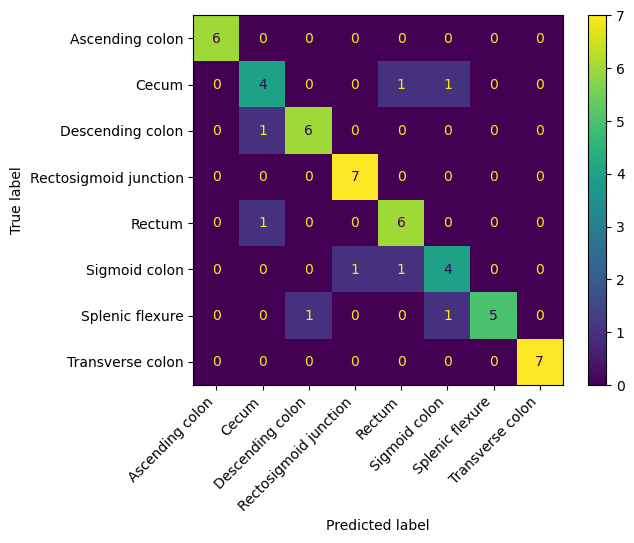

                       precision    recall  f1-score   support

      Ascending colon       1.00      1.00      1.00         6
                Cecum       0.67      0.67      0.67         6
     Descending colon       0.86      0.86      0.86         7
Rectosigmoid junction       0.88      1.00      0.93         7
               Rectum       0.75      0.86      0.80         7
        Sigmoid colon       0.67      0.67      0.67         6
      Splenic flexure       1.00      0.71      0.83         7
     Transverse colon       1.00      1.00      1.00         7

             accuracy                           0.85        53
            macro avg       0.85      0.85      0.84        53
         weighted avg       0.86      0.85      0.85        53



In [48]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and display confusion matrix on the test set
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ascending colon', 'Cecum', 'Descending colon', 
 'Rectosigmoid junction', 'Rectum', 'Sigmoid colon', 'Splenic flexure','Transverse colon'])
plt.figure(figsize=(8, 6))
cm_display.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Ascending colon', 'Cecum', 'Descending colon', 
 'Rectosigmoid junction', 'Rectum', 'Sigmoid colon', 'Splenic flexure','Transverse colon'])
print(report)

In [49]:
# Train RF model with best parameters for calculating feature importances
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
y_score = best_rf_model.fit(X_train, y_train).predict_proba(X_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.97
Macro-averaged One-vs-Rest ROC AUC score:
0.97


C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_11668\3610568644.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')


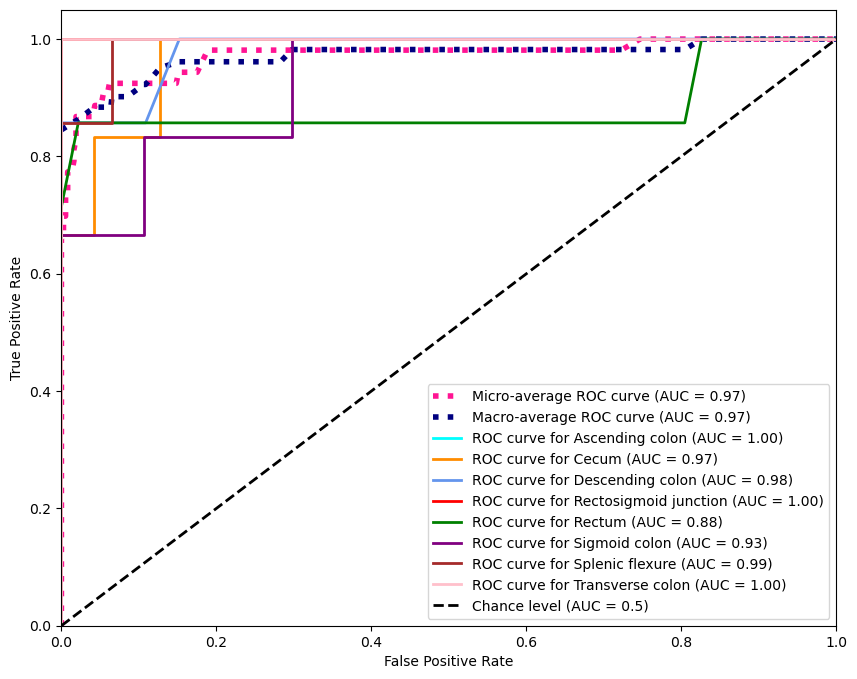

In [50]:
# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.arange(8))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(8)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(8):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 8

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for {0} (AUC = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_11668\569670634.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[top_20_indices], y=feature_names[top_20_indices], palette="viridis")


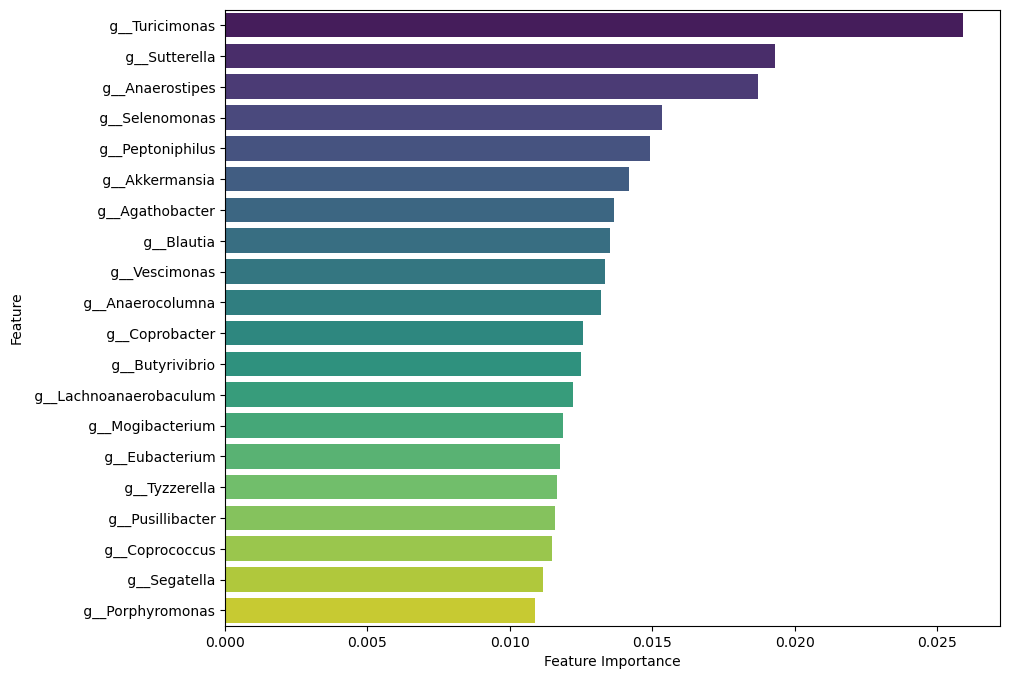

In [51]:
# Train RF model with best parameters for calculating feature importances
best_rf_model.fit(X_train, y_train)

feature_importances = best_rf_model.feature_importances_
top_20_indices = feature_importances.argsort()[::-1][:20]
feature_names = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[top_20_indices], y=feature_names[top_20_indices], palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

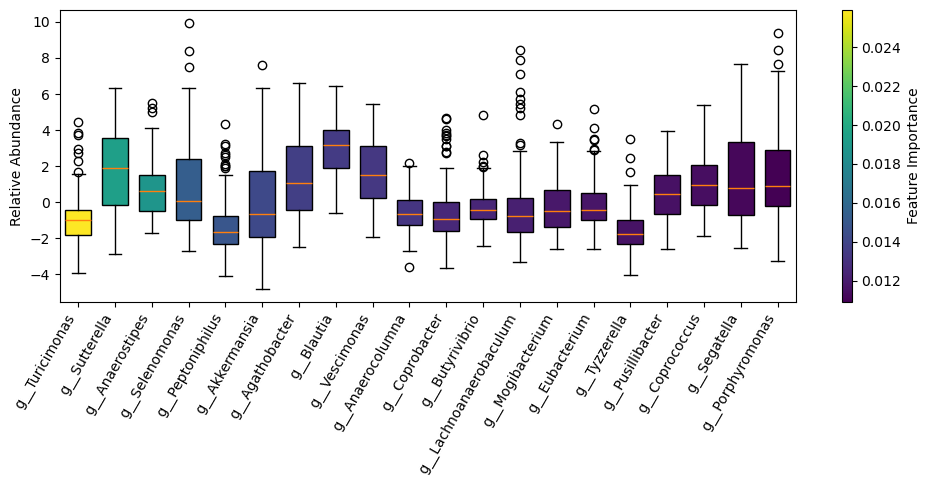

In [52]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

top_20_feature_names = feature_names[top_20_indices]

# Normalize feature importances
norm = Normalize(vmin=min(feature_importances[top_20_indices]), vmax=max(feature_importances[top_20_indices]))
cmap = plt.get_cmap('viridis')  # Choose a colormap
colors = [cmap(norm(importance)) for importance in feature_importances[top_20_indices]]

# Prepare data for boxplot
data = {}

for column_name in top_20_feature_names:
    data[column_name] = X[column_name]

# Plot boxplot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each box with the corresponding color based on feature importance
for i, (key, value) in enumerate(data.items()):
    box = ax.boxplot(value, positions=[i + 1], widths=0.7, patch_artist=True,
                     boxprops=dict(facecolor=colors[i], color='black'),
                     whiskerprops=dict(color='black'))

# Customize plot
ax.set_ylabel('Relative Abundance', fontsize=10)
ax.set_xticks(range(1, len(data) + 1))
ax.set_xticklabels(data.keys(), rotation=60, ha='right', fontsize=10)
plt.tight_layout()

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar, not for plotting
cbar = plt.colorbar(sm, ax=ax, aspect=30)
cbar.set_label('Feature Importance', fontsize=10)

plt.show()

In [53]:
#Evaluate the robustness of ML framework

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_iterations = 20
robustness_train_scores = []
robustness_test_scores = []
robustness_auroc = []

for i in range(n_iterations):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=i, stratify=y)

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the training data of the resampled set
    train_score = grid_search.best_score_
    robustness_train_scores.append(train_score)

    # Evaluate the model on the test data of the resampled set
    test_score = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))
    robustness_test_scores.append(test_score)
    
    # Calculate AUROC score
    y_test_proba = grid_search.best_estimator_.predict_proba(X_test)
    test_auroc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='macro')
    robustness_auroc.append(test_auroc)

# Calculate statistics for training data
robustness_train_mean = np.mean(robustness_train_scores)
robustness_train_std = np.std(robustness_train_scores)

# Calculate statistics for test data
robustness_test_mean = np.mean(robustness_test_scores)
robustness_test_std = np.std(robustness_test_scores)

# Calculate statistics for AUROC
robustness_auroc_mean = np.mean(robustness_auroc)
robustness_auroc_std = np.std(robustness_auroc)

print("Train Mean Accuracy:", robustness_train_mean)
print("Train Std Accuracy:", robustness_train_std)
print("Test Mean Accuracy:", robustness_test_mean)
print("Test Std Accuracy:", robustness_test_std)
print("Mean AUROC:", robustness_auroc_mean)
print("Std AUROC:", robustness_auroc_std)


Train Mean Accuracy: 0.7912403100775195
Train Std Accuracy: 0.021068755338609718
Test Mean Accuracy: 0.8235849056603772
Test Std Accuracy: 0.038332546516811394
Mean AUROC: 0.9673631530549315
Std AUROC: 0.012427218071674118


In [54]:
print(f"Train_accuracy_scores: {robustness_train_scores}" )
print(f"Test_accuracy_scores: {robustness_test_scores}" )
print(f"Test_AUROC_scores: {robustness_auroc}" )

Train_accuracy_scores: [0.8102990033222591, 0.7867109634551495, 0.8149501661129568, 0.796124031007752, 0.7957918050941306, 0.8006644518272426, 0.8196013289036544, 0.7960132890365449, 0.7776301218161683, 0.7919158361018825, 0.8059800664451826, 0.7820598006644519, 0.7821705426356589, 0.7915836101882614, 0.7918050941306756, 0.8147286821705426, 0.7627906976744186, 0.7492801771871539, 0.739313399778516, 0.8153931339977852]
Test_accuracy_scores: [0.8113207547169812, 0.8113207547169812, 0.7924528301886793, 0.9056603773584906, 0.8301886792452831, 0.7924528301886793, 0.7735849056603774, 0.8679245283018868, 0.7924528301886793, 0.8490566037735849, 0.8113207547169812, 0.8867924528301887, 0.7924528301886793, 0.7547169811320755, 0.8113207547169812, 0.8301886792452831, 0.8490566037735849, 0.8490566037735849, 0.8679245283018868, 0.7924528301886793]
Test_AUROC_scores: [0.9668392912206512, 0.9761257763975155, 0.9473082132945685, 0.9684719285494031, 0.9623268248094798, 0.9677010373992336, 0.9336166358310